# 0. 캐글(Kaggle)에서 제공하는 데이터 사용

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
Image(url="https://t1.daumcdn.net/cfile/tistory/991122395B69BE1319")

# 1. 라이브러리 추가 및 데이터 가져오기

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
pd_train = pd.read_csv('train.csv')
pd_test = pd.read_csv('test.csv')

# 2. 데이터 시각화

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pd_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived 0 : 사망
- Survived 1 : 생존

### 2.1 (Example) Pclass 생존율

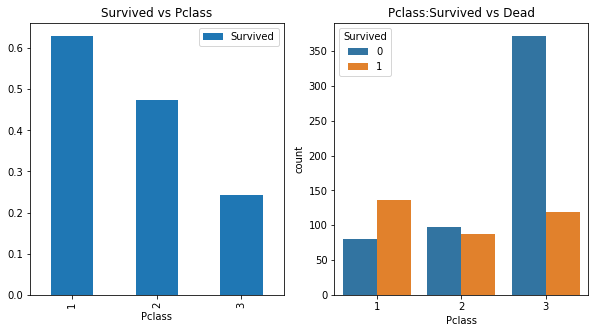

In [7]:
x, y = plt.subplots(1, 2, figsize=(10,5))
pd_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=y[0])
y[0].set_title('Survived vs Pclass')
sns.countplot('Pclass', hue='Survived', data=pd_train, ax=y[1])
y[1].set_title('Pclass:Survived vs Dead')
plt.show()

### 2.2 (Example) Sex 생존율

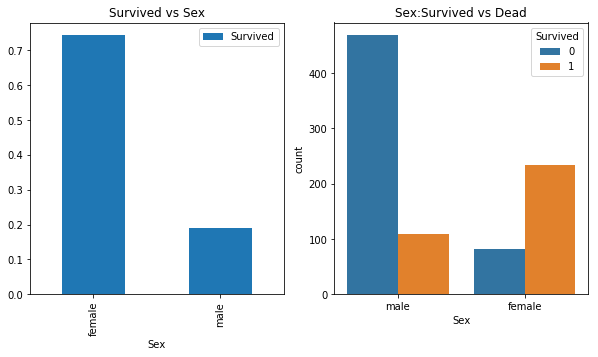

In [8]:
x, y = plt.subplots(1, 2, figsize=(10,5))
pd_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=y[0])
y[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=pd_train, ax=y[1])
y[1].set_title('Sex:Survived vs Dead')
plt.show()

# 3. 데이터 전처리

In [9]:
pd_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
pd_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 3.1 Name

In [11]:
def name_change(df):
    df['NameA'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    return df

pd_train = name_change(pd_train)
pd_test = name_change(pd_test)

In [12]:
from sklearn import preprocessing

In [13]:
def name_change(df):
    LE = preprocessing.LabelEncoder()
    df['NameA'] = LE.fit_transform(df['NameA']) 
    return df

pd_train = name_change(pd_train)
pd_test = name_change(pd_test)

pd_train.drop('Name', axis=1, inplace=True)
pd_test.drop('Name', axis=1, inplace=True)

### 3.2 Sex

In [14]:
def sex_change(df):
    LE = preprocessing.LabelEncoder()
    df['Sex'] = LE.fit_transform(df['Sex']) 
    return df

pd_train = sex_change(pd_train)
pd_test = sex_change(pd_test)

### 3.3 Embarked

In [15]:
pd_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
pd_train.Embarked = pd_train.Embarked.fillna('S')

In [17]:
def embarked_change(df):
    LE = preprocessing.LabelEncoder()
    df['Embarked'] = LE.fit_transform(df['Embarked']) 
    return df

pd_train = embarked_change(pd_train)
pd_test = embarked_change(pd_test)

### 3.4 Age

In [18]:
def process_age(df):
    df["Age"] = df["Age"].fillna(pd_train.Pclass.mean())
    return df

pd_train = process_age(pd_train)
pd_test = process_age(pd_test)

In [19]:
age_group = [pd_train, pd_test]
for dataset in age_group:
    dataset['Age'] = dataset['Age'].astype(int)
    pd_train['AgeA'] = pd.cut(pd_train['Age'], 5)
print(pd_train[['AgeA', 'Survived']].groupby(['AgeA'], as_index=False).mean())

            AgeA  Survived
0  (-0.08, 16.0]  0.386282
1   (16.0, 32.0]  0.370690
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [20]:
for dataset in age_group:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['AgeA'] = dataset['Age'].map( { 0: 'Minor',  1: 'Young Man', 2: 'Middle', 3: 'Old', 4: 'Longevity Old Man'} ).astype(str)

In [21]:
def age_change(df):
    LE = preprocessing.LabelEncoder()
    df["AgeA"] = LE.fit_transform(df["AgeA"]) 
    return df

pd_train = age_change(pd_train)
pd_test = age_change(pd_test)

pd_train.drop('Age', axis=1, inplace=True)
pd_test.drop('Age', axis=1, inplace=True)

In [22]:
pd_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameA,AgeA
0,1,0,3,1,1,0,A/5 21171,7.2500,NaN,2,12,4
1,2,1,1,0,1,0,PC 17599,71.2833,C85,0,13,1
2,3,1,3,0,0,0,STON/O2. 3101282,7.9250,NaN,2,9,4
3,4,1,1,0,1,0,113803,53.1000,C123,2,13,1
4,5,0,3,1,0,0,373450,8.0500,NaN,2,12,1


### 3.5 Cabin

In [23]:
def cabin_change(df):
    df["CabinA"] = df["Cabin"].str.extract('([A-Z]+)', expand=False)
    return df

pd_train = cabin_change(pd_train)
pd_test = cabin_change(pd_test)

In [24]:
pd_train.CabinA.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinA, dtype: int64

In [25]:
pd_train.CabinA = pd_train.Cabin.fillna("C")

In [26]:
pd_test.CabinA.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinA, dtype: int64

In [27]:
pd_test.CabinA = pd_test.Cabin.fillna("C")

In [28]:
def cabin_change(df):
    LE = preprocessing.LabelEncoder()
    df["CabinA"] = LE.fit_transform(df["CabinA"]) 
    return df

pd_train = cabin_change(pd_train)
pd_test = cabin_change(pd_test)

pd_train.drop('Cabin', axis=1, inplace=True)
pd_test.drop('Cabin', axis=1, inplace=True)

### 3.6 Fare

In [29]:
pd_test["Fare"].fillna(pd_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [30]:
pd_train['FareA'] = pd.qcut(pd_train['Fare'], 5)
print(pd_train[['FareA', 'Survived']].groupby(['FareA'], as_index=False).mean())

               FareA  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


In [31]:
fare_group = [pd_train, pd_test]
for dataset in fare_group:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['FareA'] = dataset['Fare'].astype(int)
    
pd_train.drop('Fare', axis=1, inplace=True)
pd_test.drop('Fare', axis=1, inplace=True)

### 3.7 데이터 전처리 확인

In [32]:
pd_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
NameA          0
AgeA           0
CabinA         0
FareA          0
dtype: int64

In [33]:
pd_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
NameA          0
AgeA           0
CabinA         0
FareA          0
dtype: int64

In [34]:
pd_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,NameA,AgeA,CabinA,FareA
0,1,0,3,1,1,0,A/5 21171,2,12,4,48,0
1,2,1,1,0,1,0,PC 17599,0,13,1,82,4
2,3,1,3,0,0,0,STON/O2. 3101282,2,9,4,48,1
3,4,1,1,0,1,0,113803,2,13,1,56,4
4,5,0,3,1,0,0,373450,2,12,1,48,1


In [35]:
pd_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,NameA,AgeA,CabinA,FareA
0,892,3,1,0,0,330911,1,5,1,21,0
1,893,3,0,1,0,363272,2,6,1,21,0
2,894,2,1,0,0,240276,1,5,3,21,1
3,895,3,1,0,0,315154,2,5,4,21,1
4,896,3,0,1,1,3101298,2,6,4,21,2


In [36]:
pd_train.drop('Ticket', axis=1, inplace=True)
pd_test.drop('Ticket', axis=1, inplace=True)

# 4. 데이터 정규화

In [37]:
pd_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'NameA', 'AgeA', 'CabinA', 'FareA'],
      dtype='object')

In [38]:
def feature_scale(df):
    SS = preprocessing.StandardScaler().fit(df[['Pclass',
                                                'Sex',
                                                'SibSp',
                                                'Parch',
                                                'Embarked', 
                                                'NameA', 
                                                'AgeA', 
                                                'CabinA', 
                                                'FareA']])
    df[['Pclass', 
        'Sex',
        'SibSp',
        'Parch',
        'Embarked',
        'NameA',
        'AgeA', 
        'CabinA',
        'FareA']] = SS.transform(df[['Pclass',
                                     'Sex',
                                     'SibSp',
                                     'Parch',
                                     'Embarked',
                                     'NameA',
                                     'AgeA',
                                     'CabinA',
                                     'FareA']])
    return df

pd_train = feature_scale(pd_train)
pd_test = feature_scale(pd_test)

# 5. 데이터 전처리 전후 비교 → 상관분석

In [39]:
pd_train.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,NameA,AgeA,CabinA,FareA
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.013128,0.021692,-0.002200,-0.018661,-0.006761
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.167675,-0.201345,-0.005260,0.173286,0.317300
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,0.162098,0.045541,0.095281,-0.242997,-0.703533
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.108262,0.256407,-0.005178,-0.101665,-0.246021
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.068230,-0.191786,-0.086531,-0.004940,0.357117
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,0.039798,-0.119721,-0.132263,0.022286,0.350789
Embarked,0.013128,-0.167675,0.162098,0.108262,0.068230,0.039798,1.000000,0.066462,0.037194,0.025475,-0.112649
NameA,0.021692,-0.201345,0.045541,0.256407,-0.191786,-0.119721,0.066462,1.000000,0.039165,0.014969,-0.101465
AgeA,-0.002200,-0.005260,0.095281,-0.005178,-0.086531,-0.132263,0.037194,0.039165,1.000000,-0.033784,-0.121149
CabinA,-0.018661,0.173286,-0.242997,-0.101665,-0.004940,0.022286,0.025475,0.014969,-0.033784,1.000000,0.189851


In [40]:
def plot_correlation_map(df):
    corr = pd_train.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

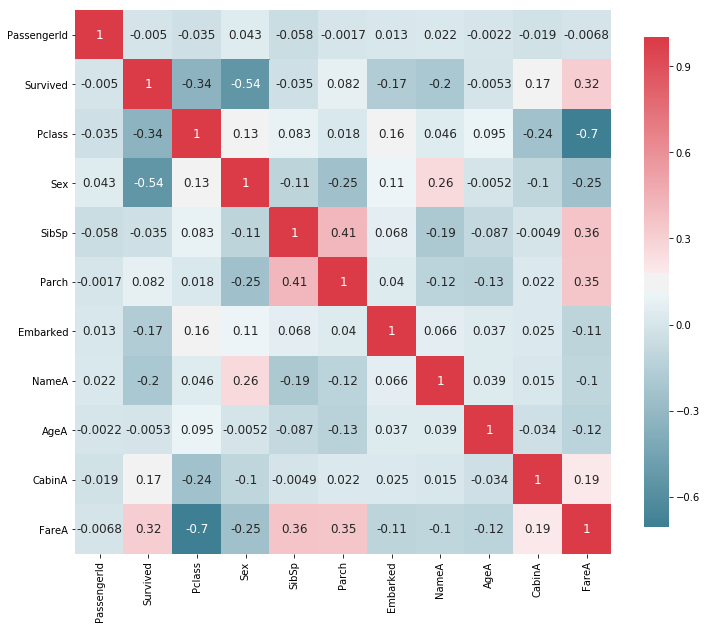

In [41]:
plot_correlation_map(pd_train)

# 6. 모델 학습 전 Setting

In [42]:
feature = pd_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NameA', 'AgeA', 'CabinA', 'FareA']]
target = pd_train[['Survived']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 9) (268, 9) (623, 1) (268, 1)


# 7. 파라미터 조정

In [45]:
from sklearn.model_selection import GridSearchCV

### 7.1 (Example) RandomForest Algorithm

In [46]:
randomforest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]
}

In [47]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest = GridSearchCV(estimator=randomforest, param_grid=randomforest_param_grid, cv=5)
randomforest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 6, 10], 'criterion': ['gini', 'entropy'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
randomforest.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 0}

### 7.2 (Example) XGBoost Algorithm

In [49]:
xgboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'reg_alpha': [0.01, 0.02, 0.03]
}

In [50]:
from xgboost import XGBClassifier

In [51]:
xgboost = XGBClassifier()
xgboost = GridSearchCV(estimator=xgboost, param_grid=xgboost_param_grid, cv=5)
xgboost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 10], 'subsample': [0.2, 0.4, 0.6, 0.8, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7], 'reg_alpha': [0.01, 0.02, 0.03]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
xgboost.best_params_

{'colsample_bytree': 0.6,
 'max_depth': 6,
 'n_estimators': 100,
 'reg_alpha': 0.02,
 'subsample': 0.2}

# 8. 변수 중요도

### 8.1 (Example) RandomForest Algorithm → 파라미터 조정 전

Feature Importance of RandomForest(parameter before) : 
[0.11623351 0.23577155 0.07366527 0.04792614 0.06197544 0.12978792
 0.09344547 0.13154365 0.10965106]


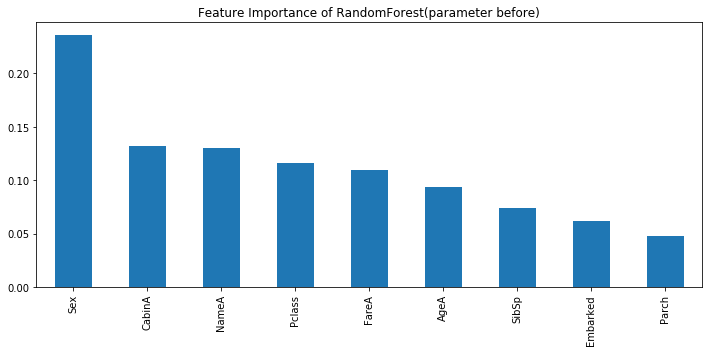

In [53]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
print("Feature Importance of RandomForest(parameter before) : \n{}".format(randomforest.feature_importances_))
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter before)')
plt.tight_layout()

Feature Importance of XGboost(parameter before) : 
[0.11623351 0.23577155 0.07366527 0.04792614 0.06197544 0.12978792
 0.09344547 0.13154365 0.10965106]


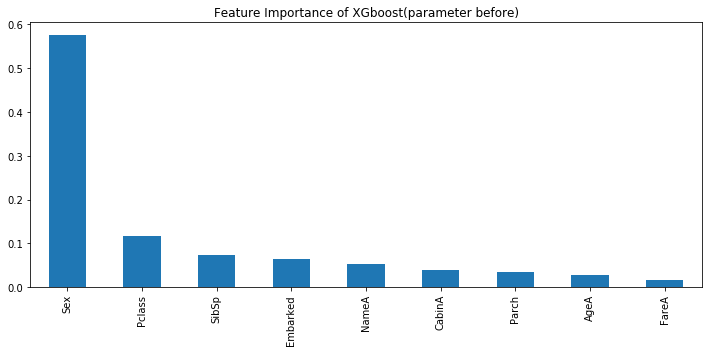

In [54]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
print("Feature Importance of XGboost(parameter before) : \n{}".format(randomforest.feature_importances_))
coef = pd.Series(xgboost.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of XGboost(parameter before)')
plt.tight_layout()

Feature Importance of RandomForest(parameter before) : 
[0.10580378 0.30074422 0.07868603 0.05628946 0.04990821 0.10050973
 0.08708307 0.11714978 0.10382573]


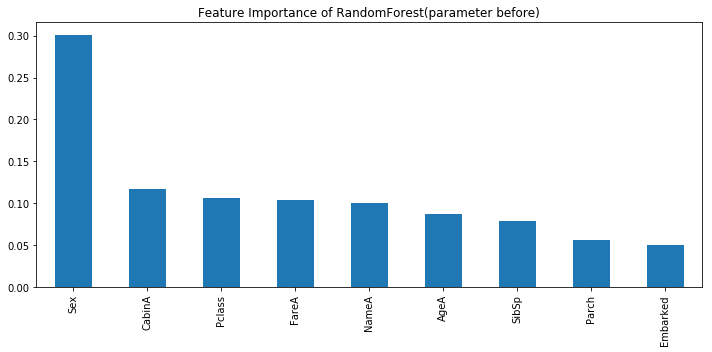

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
randomforest = ExtraTreesClassifier()
randomforest.fit(X_train, y_train)
print("Feature Importance of RandomForest(parameter before) : \n{}".format(randomforest.feature_importances_))
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter before)')
plt.tight_layout()

Feature Importance of RandomForest(parameter before) : 
[0.12494485 0.48681372 0.09740407 0.01676707 0.03769703 0.06541148
 0.04205947 0.12322981 0.00567252]


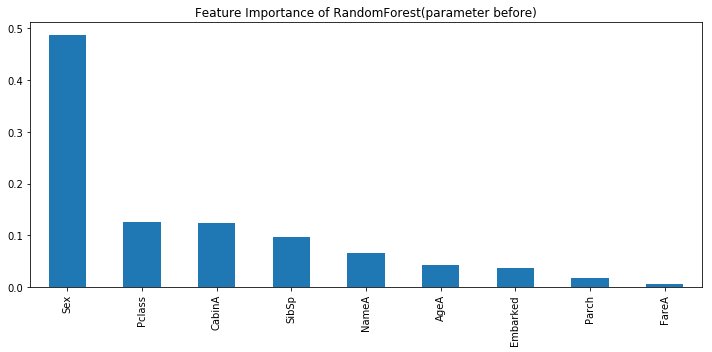

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
randomforest = GradientBoostingClassifier()
randomforest.fit(X_train, y_train)
print("Feature Importance of RandomForest(parameter before) : \n{}".format(randomforest.feature_importances_))
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter before)')
plt.tight_layout()

Feature Importance of RandomForest(parameter before) : 
[0.06 0.06 0.06 0.04 0.02 0.16 0.14 0.4  0.06]


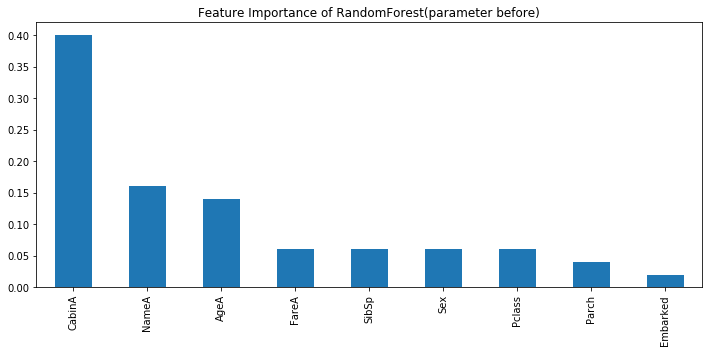

In [57]:
from sklearn.ensemble import AdaBoostClassifier
randomforest = AdaBoostClassifier()
randomforest.fit(X_train, y_train)
print("Feature Importance of RandomForest(parameter before) : \n{}".format(randomforest.feature_importances_))
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter before)')
plt.tight_layout()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
print("Feature Importance of RandomForest(parameter before) : \n{}".format(randomforest.feature_importances_))

Feature Importance of RandomForest(parameter before) : 
[0.1163387  0.29767923 0.06212315 0.04667878 0.05037887 0.10258613
 0.0869136  0.14339298 0.09390854]


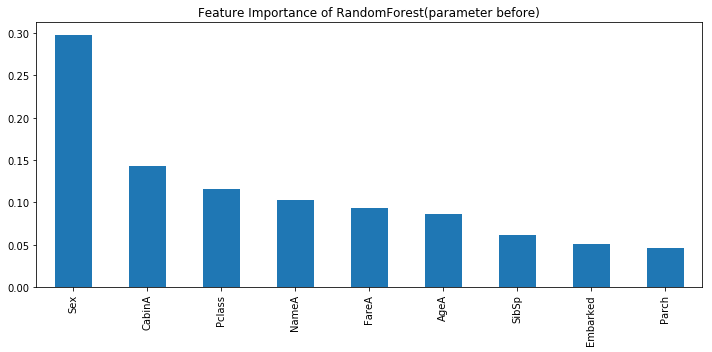

In [55]:
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter before)')
plt.tight_layout()

### 8.2 (Example) RnadomForest Algorithm → 파라미터 조정 후

In [56]:
randomforest = RandomForestClassifier(criterion='gini',
                                      max_depth=6,
                                      max_features='sqrt',
                                      n_estimators=200,
                                      random_state=0)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
print("Feature Importance of RandomForest(parameter after) : \n{}".format(randomforest.feature_importances_))

Feature Importance of RandomForest(parameter after) : 
[0.11008557 0.327771   0.07961085 0.03871941 0.03735618 0.20040094
 0.04279952 0.0912337  0.07202284]


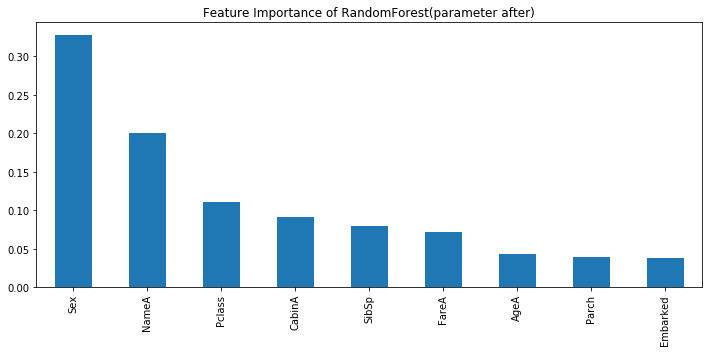

In [58]:
coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of RandomForest(parameter after)')
plt.tight_layout()

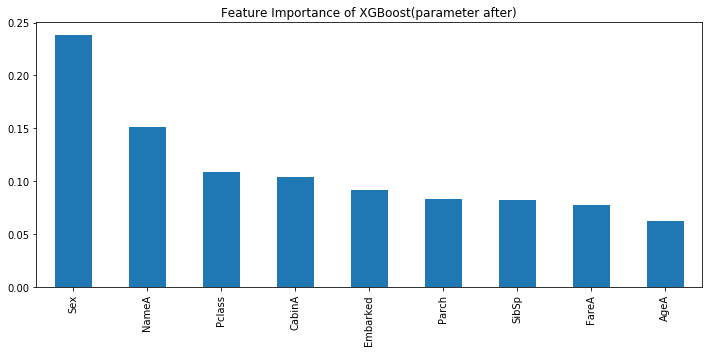

In [64]:
coef = pd.Series(xgboost.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of XGBoost(parameter after)')
plt.tight_layout()

### 8.3 (Example) XGBoost Algorithm → 파라미터 조정 전

In [59]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
print("Feature Importance of XGBoost(parameter before) : \n{}".format(xgboost.feature_importances_))

Feature Importance of XGBoost(parameter before) : 
[0.11667775 0.5757292  0.07366282 0.03385052 0.06537451 0.05211968
 0.02801814 0.03893828 0.01562913]


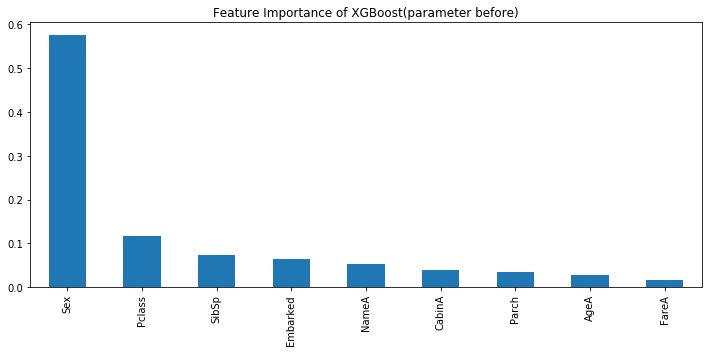

In [61]:
coef = pd.Series(xgboost.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Importance of XGBoost(parameter before)')
plt.tight_layout()

### 8.4 (Example) XGBoost Algorithm → 파라미터 조정 후

In [62]:
xgboost = XGBClassifier(colsample_bytree=0.6,
                        max_depth=6,
                        n_estimators=100,
                        reg_alpha=0.02,
                        subsample=0.2)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.02, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.2)

In [63]:
print("Feature Importance of XGBoost(parameter after) : \n{}".format(xgboost.feature_importances_))

Feature Importance of XGBoost(parameter after) : 
[0.10857483 0.238254   0.08230926 0.08337237 0.09160268 0.15155882
 0.06223319 0.10437542 0.07771943]


# 9. 모델 학습 → 파라미터 최적화 및 교차검증 없음

In [65]:
from sklearn.linear_model import LogisticRegression             # 1
from sklearn.svm import SVC                                     # 2
from sklearn.linear_model import Perceptron                     # 3
from sklearn.neural_network import MLPClassifier                # 4
from sklearn.tree import DecisionTreeClassifier                 # 5
from sklearn.naive_bayes import GaussianNB                      # 6
from sklearn.linear_model import SGDClassifier                  # 7
from sklearn.neighbors import KNeighborsClassifier              # 8
from sklearn.ensemble import RandomForestClassifier             # 9
from sklearn.ensemble import GradientBoostingClassifier         # 10
from sklearn.ensemble import AdaBoostClassifier                 # 11
from sklearn.ensemble import ExtraTreesClassifier               # 12
from xgboost import XGBClassifier                               # 13
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### 9.1 LogisticRegression

In [66]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)
logisticregression_prediction = logisticregression.predict(X_test)
logisticregression_score = accuracy_score(y_test, logisticregression_prediction)
print(metrics.classification_report(y_test, logisticregression_prediction))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



### 9.2 SupportVectorMachine

In [67]:
svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_prediction)
print(metrics.classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       168
           1       0.74      0.76      0.75       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### 9.3 Perceptron

In [68]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_prediction = perceptron.predict(X_test)
perceptron_score = accuracy_score(y_test, perceptron_prediction)
print(metrics.classification_report(y_test, perceptron_prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.69      0.66      0.67       100

   micro avg       0.76      0.76      0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



### 9.4 MultiLayerPerceptron

In [69]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)
mlp_score = accuracy_score(y_test, mlp_prediction)
print(metrics.classification_report(y_test, mlp_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       168
           1       0.76      0.68      0.72       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



### 9.5 DecisionTree

In [70]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
decisiontree_prediction = decisiontree.predict(X_test)
decisiontree_score = accuracy_score(y_test, decisiontree_prediction)
print(metrics.classification_report(y_test, decisiontree_prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       168
           1       0.79      0.67      0.72       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



### 9.6 GaussianNaiveBayes

In [71]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannb_prediction = gaussiannb.predict(X_test)
gaussiannb_score = accuracy_score(y_test, gaussiannb_prediction)
print(metrics.classification_report(y_test, gaussiannb_prediction))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       168
           1       0.68      0.79      0.73       100

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.78      0.79       268



### 9.7 StochasticGradientDescent

In [72]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)
sgd_score = accuracy_score(y_test, sgd_prediction)
print(metrics.classification_report(y_test, sgd_prediction))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       168
           1       0.66      0.79      0.72       100

   micro avg       0.77      0.77      0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268



### 9.8 KNearestNeighbors

In [73]:
knearestneighbors = KNeighborsClassifier()
knearestneighbors.fit(X_train, y_train)
knearestneighbors_prediction = knearestneighbors.predict(X_test)
knearestneighbors_score = accuracy_score(y_test, knearestneighbors_prediction)
print(metrics.classification_report(y_test, knearestneighbors_prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       168
           1       0.79      0.74      0.76       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



### 9.9 RandomForest

In [74]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
randomforest_prediction = randomforest.predict(X_test)
randomforest_score = accuracy_score(y_test, randomforest_prediction)
print(metrics.classification_report(y_test, randomforest_prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       168
           1       0.78      0.68      0.73       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



### 9.10 GradientBoosting

In [75]:
gradientboosting = GradientBoostingClassifier()
gradientboosting.fit(X_train, y_train)
gradientboosting_prediction = gradientboosting.predict(X_test)
gradientboosting_score = accuracy_score(y_test, gradientboosting_prediction)
print(metrics.classification_report(y_test, gradientboosting_prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       168
           1       0.81      0.72      0.76       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



### 9.11 AdaBoost

In [76]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_prediction = adaboost.predict(X_test)
adaboost_score = accuracy_score(y_test, adaboost_prediction)
print(metrics.classification_report(y_test, adaboost_prediction))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.77      0.77      0.77       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



### 9.12 ExtraTree

In [77]:
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
extratree_prediction = extratree.predict(X_test)
extratree_score = accuracy_score(y_test, extratree_prediction)
print(metrics.classification_report(y_test, extratree_prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       168
           1       0.81      0.69      0.75       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### 9.13 XGBoost

In [78]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
print(metrics.classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       168
           1       0.82      0.69      0.75       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



### 9.14 파라미터 최적화 미적용 모델 성능 비교

In [79]:
models = pd.DataFrame({
    'Model' : ["LogisticRegression", "SupportVectorMachine", "Perceptron", "MultiLayerPerceptron", "DecisionTree", "GaussianNB", "StochasticGradientDescent",
              "KNearestNeighbors", "RandomForest", "GradientBoosting", "AdaBoost", "ExtraTree", "XGBoost"],
    'Score' : [logisticregression_score, svc_score, perceptron_score, mlp_score, decisiontree_score, gaussiannb_score, sgd_score,
                knearestneighbors_score, knearestneighbors_score, randomforest_score, gradientboosting_score, extratree_score, xgb_score]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
10,AdaBoost,0.832090
7,KNearestNeighbors,0.828358
8,RandomForest,0.828358
12,XGBoost,0.828358
11,ExtraTree,0.824627
1,SupportVectorMachine,0.809701
4,DecisionTree,0.809701
9,GradientBoosting,0.809701
0,LogisticRegression,0.798507
3,MultiLayerPerceptron,0.798507


# 10. 모델 학습 → 파라미터 최적화 및 교차검증 있음

In [80]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # 교차검증(Cross-Validation)
values = [0.001, 0.01, 0.1, 1, 10, 100]

### 10.1 LogisticRegression

In [81]:
parameters = {'penalty': ['l1', 'l2']}, {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, {'max_iter': range(100, 1000)}, {'C': values}
logisticregression_2 = LogisticRegression()
logisticregression_2 = GridSearchCV(logisticregression_2, parameters, cv=kfold)
logisticregression_2.fit(X_train, y_train)
logisticregression_prediction_2 = logisticregression_2.predict(X_test)

c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
score = logisticregression_2.score(X_test, y_test)
score_1 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(logisticregression_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(logisticregression_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(logisticregression_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.772071
GridSearchCV를 이용한 최적 매개변수 ==> {'penalty': 'l1'}
GridSearchCV를 이용한 test점수 ==> 0.798507
GridSearchCV를 이용한 최고 성능 모델 ==> 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### 10.2 SupportVectorMachine

In [83]:
parameters = {'kernel': ['rbf'], 'C': values,
              'kernel': ['gamma'], 'C': values,
              'kernel': ['linear'], 'C': values}
svc_2 = SVC()
svc_2 = GridSearchCV(svc_2, parameters, cv=kfold)
svc_2.fit(X_train, y_train)
svc_prediction_2 = svc_2.predict(X_test)

In [84]:
score = svc_2.score(X_test, y_test)
score_2 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(svc_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(svc_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(svc_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.786517
GridSearchCV를 이용한 최적 매개변수 ==> {'C': 0.01, 'kernel': 'linear'}
GridSearchCV를 이용한 test점수 ==> 0.787313
GridSearchCV를 이용한 최고 성능 모델 ==> 
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


### 10.3 Perceptron

In [85]:
parameters = {'alpha': 10.0 ** -np.arange(1, 7),
              'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
perceptron_2 = Perceptron()
perceptron_2 = GridSearchCV(perceptron_2, parameters, cv=kfold)
perceptron_2.fit(X_train, y_train)
perceptron_prediction_2 = perceptron_2.predict(X_test)

c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
score = perceptron_2.score(X_test, y_test)
score_3 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(perceptron_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(perceptron_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(perceptron_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.765650
GridSearchCV를 이용한 최적 매개변수 ==> {'alpha': 0.1, 'random_state': 8}
GridSearchCV를 이용한 test점수 ==> 0.753731
GridSearchCV를 이용한 최고 성능 모델 ==> 
Perceptron(alpha=0.1, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=8, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)


### 10.4 MultiLayerPerceptron

In [87]:
parameters = {'alpha': 10.0 ** -np.arange(1, 5),
              'hidden_layer_sizes': range(1, 10),
              'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
mlp_2 = MLPClassifier()
mlp_2 = GridSearchCV(mlp_2, parameters, cv=kfold)
mlp_2.fit(X_train, y_train)
mlp_prediction_2 = mlp_2.predict(X_test)

c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
score = mlp_2.score(X_test, y_test)
score_4 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(mlp_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(mlp_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(mlp_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.810594
GridSearchCV를 이용한 최적 매개변수 ==> {'alpha': 0.01, 'hidden_layer_sizes': 6, 'random_state': 7}
GridSearchCV를 이용한 test점수 ==> 0.802239
GridSearchCV를 이용한 최고 성능 모델 ==> 
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=6, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=7, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


### 10.5 DecisionTree

In [89]:
parameters = {'criterion': ['gini', 'entropy']}, {'splitter': ['random', 'best']}
decisiontree_2 = DecisionTreeClassifier()
decisiontree_2 = GridSearchCV(decisiontree_2, parameters, cv=kfold)
decisiontree_2.fit(X_train, y_train)
decisiontree_prediction_2 = decisiontree_2.predict(X_test)

In [90]:
score = decisiontree_2.score(X_test, y_test)
score_5 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(decisiontree_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(decisiontree_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(decisiontree_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.789727
GridSearchCV를 이용한 최적 매개변수 ==> {'criterion': 'entropy'}
GridSearchCV를 이용한 test점수 ==> 0.805970
GridSearchCV를 이용한 최고 성능 모델 ==> 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### 10.6 GaussianNaiveBayes

In [91]:
parameters = {'var_smoothing': 10.0 ** -np.arange(1, 15)}
gaussiannb_2 = GaussianNB()
gaussiannb_2 = GridSearchCV(gaussiannb_2, parameters, cv=kfold)
gaussiannb_2.fit(X_train, y_train)
gaussiannb_prediction_2 = gaussiannb_2.predict(X_test)

In [92]:
score = gaussiannb_2.score(X_test, y_test)
score_6 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(gaussiannb_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(gaussiannb_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(gaussiannb_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.783307
GridSearchCV를 이용한 최적 매개변수 ==> {'var_smoothing': 0.01}
GridSearchCV를 이용한 test점수 ==> 0.783582
GridSearchCV를 이용한 최고 성능 모델 ==> 
GaussianNB(priors=None, var_smoothing=0.01)


### 10.7 StochasticGradientDescent

In [93]:
parameters = {'alpha': 10.0 ** -np.arange(1, 5)}
sgd_2 = SGDClassifier()
sgd_2 = GridSearchCV(sgd_2, parameters)
sgd_2.fit(X_train, y_train)
sgd_prediction_2 = sgd_2.predict(X_test)

In [94]:
score = sgd_2.score(X_test, y_test)
score_7 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(sgd_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(sgd_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(sgd_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.792937
GridSearchCV를 이용한 최적 매개변수 ==> {'alpha': 0.01}
GridSearchCV를 이용한 test점수 ==> 0.764925
GridSearchCV를 이용한 최고 성능 모델 ==> 
SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


### 10.8 KNearestNeighbors

In [95]:
parameters = {'n_neighbors': range(1, 100)}
knearestneighbors_2 = KNeighborsClassifier()
knearestneighbors_2 = GridSearchCV(knearestneighbors_2, parameters)
knearestneighbors_2.fit(X_train, y_train)
knearestneighbors_prediction_2 = knearestneighbors_2.predict(X_test)

In [96]:
score = knearestneighbors_2.score(X_test, y_test)
score_8 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(knearestneighbors_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(knearestneighbors_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(knearestneighbors_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.817014
GridSearchCV를 이용한 최적 매개변수 ==> {'n_neighbors': 11}
GridSearchCV를 이용한 test점수 ==> 0.809701
GridSearchCV를 이용한 최고 성능 모델 ==> 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')


### 10.9 RandomForest

In [97]:
parameters = {'n_estimators': range(1, 100)}, {'criterion': ['entropy', 'gini']}
randomforest_2 = RandomForestClassifier()
randomforest_2 = GridSearchCV(randomforest_2, parameters)
randomforest_2.fit(X_train, y_train)
randomforest_prediction_2 = randomforest_2.predict(X_test)

In [98]:
score = randomforest_2.score(X_test, y_test)
score_9 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(randomforest_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(randomforest_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(randomforest_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.825040
GridSearchCV를 이용한 최적 매개변수 ==> {'n_estimators': 96}
GridSearchCV를 이용한 test점수 ==> 0.813433
GridSearchCV를 이용한 최고 성능 모델 ==> 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### 10.10 GradientBoosting

In [99]:
parameters = {'n_estimators': range(1, 100)}, {'learning_rate': np.arange(0.1, 10.1, 0.1)}, {'min_samples_split': np.linspace(0.1, 0.5, 12)}, {'min_samples_leaf': np.linspace(0.1, 0.5, 12)}
gradientboosting_2 = GradientBoostingClassifier()
gradientboosting_2 = GridSearchCV(gradientboosting_2, parameters)
gradientboosting_2.fit(X_train, y_train)
gradientboosting_prediction_2 = gradientboosting_2.predict(X_test)

c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
score = gradientboosting_2.score(X_test, y_test)
score_10 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(gradientboosting_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(gradientboosting_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(gradientboosting_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.818620
GridSearchCV를 이용한 최적 매개변수 ==> {'n_estimators': 35}
GridSearchCV를 이용한 test점수 ==> 0.828358
GridSearchCV를 이용한 최고 성능 모델 ==> 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=35,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


### 10.11 AdaBoost

In [102]:
parameters = {'n_estimators': range(1, 100)}, {'learning_rate': np.arange(0.1, 10.1, 0.1)}
adaboost_2 = AdaBoostClassifier()
adaboost_2 = GridSearchCV(adaboost_2, parameters)
adaboost_2.fit(X_train, y_train)
adaboost_prediction_2 = adaboost_2.predict(X_test)

c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [103]:
score = adaboost_2.score(X_test, y_test)
score_11 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(adaboost_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(adaboost_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(adaboost_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.812199
GridSearchCV를 이용한 최적 매개변수 ==> {'n_estimators': 37}
GridSearchCV를 이용한 test점수 ==> 0.832090
GridSearchCV를 이용한 최고 성능 모델 ==> 
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=37, random_state=None)


### 10.12 ExtraTree

In [104]:
parameters = {'n_estimators' : range(1, 100)}
extratree_2 = ExtraTreesClassifier()
extratree_2 = GridSearchCV(extratree_2, parameters)
extratree_2.fit(X_train, y_train)
extratree_prediction_2 = extratree_2.predict(X_test)

In [105]:
score = extratree_2.score(X_test, y_test)
score_12 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(extratree_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(extratree_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(extratree_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.810594
GridSearchCV를 이용한 최적 매개변수 ==> {'n_estimators': 13}
GridSearchCV를 이용한 test점수 ==> 0.813433
GridSearchCV를 이용한 최고 성능 모델 ==> 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


### 10.13 XGBoost

In [106]:
parameters = {'n_estimators': [100, 200, 300, 400, 500], 
              'max_depth': [3, 6, 10],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.6, 0.7],
              'reg_alpha': [0.01, 0.02, 0.03]}
xgb_2 = XGBClassifier()
xgb_2 = GridSearchCV(xgb_2, parameters)
xgb_2.fit(X_train, y_train)
xgb_prediction_2 = xgb_2.predict(X_test)

In [107]:
score = xgb_2.score(X_test, y_test)
score_13 = score
print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.6f}'.format(xgb_2.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(xgb_2.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.6f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(xgb_2.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.828250
GridSearchCV를 이용한 최적 매개변수 ==> {'colsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.03, 'subsample': 0.4}
GridSearchCV를 이용한 test점수 ==> 0.824627
GridSearchCV를 이용한 최고 성능 모델 ==> 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4)


# 11. 학습 모델 성능 비교 → 파라미터 조정 전후 머신러닝 알고리즘 성능 확인

In [108]:
models = pd.DataFrame({
    'Model' : ["LogisticRegression", "SupportVectorMachine", "Perceptron", "MultiLayerPerceptron", "DecisionTree", "GaussianNB", "StochasticGradientDescent",
              "KNearestNeighbors", "RandomForest", "GradientBoosting", "AdaBoost", "ExtraTree", "XGBoost"],
    'Score' : [score_1, score_2, score_3, score_4, score_5, score_6, score_7,
               score_8, score_9, score_10, score_11, score_12, score_13]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
10,AdaBoost,0.832090
9,GradientBoosting,0.828358
12,XGBoost,0.824627
8,RandomForest,0.813433
11,ExtraTree,0.813433
7,KNearestNeighbors,0.809701
4,DecisionTree,0.805970
3,MultiLayerPerceptron,0.802239
0,LogisticRegression,0.798507
1,SupportVectorMachine,0.787313


# 12. 학습 모델 시각화 → 텐서보드 이용

In [128]:
seed = 5
input_size = X_train.shape[1]
learning_rate = 0.01
epochs = 1000

In [129]:
graph = tf.Graph()
with graph.as_default():
    tf.set_random_seed(seed)
    np.random.seed(seed)

    X_input = tf.placeholder(dtype=tf.float32, shape=[None, input_size], name='X_input')
    y_input = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y_input')
    
    W1 = tf.Variable(tf.random_normal(shape=[input_size, 1], seed=seed), name='W1')
    b1 = tf.Variable(tf.random_normal(shape=[1], seed=seed), name='b1')
    sigm = tf.nn.sigmoid(tf.add(tf.matmul(X_input, W1), b1), name='pred')
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_input,
                                                                  logits=sigm, name='loss'))
    train_steps = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    pred = tf.cast(tf.greater_equal(sigm, 0.5), tf.float32, name='pred')
    acc = tf.reduce_mean(tf.cast(tf.equal(pred, y_input), tf.float32), name='acc')
    
    init_var = tf.global_variables_initializer()

In [130]:
pd_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NameA',
       'AgeA', 'CabinA', 'FareA'],
      dtype='object')

In [131]:
feature_test = pd_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NameA', 'AgeA', 'CabinA', 'FareA']]

In [132]:
train_dict = {X_input: X_train, y_input: y_train}
validation_dict = {X_input: X_test, y_input: y_test}
test_dict = {X_input: feature_test}

In [133]:
sess = tf.Session(graph=graph)
sess.run(init_var)

In [135]:
cur_loss = sess.run(loss, feed_dict=train_dict)
train_acc = sess.run(acc, feed_dict=train_dict)
test_acc = sess.run(acc, feed_dict=validation_dict)
print('step 0: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(cur_loss, 100*train_acc, 100*test_acc))
for step in range(1, epochs+1):
    writer = tf.summary.FileWriter('tensorflow_1.5/logs', sess.graph)
    sess.run(train_steps, feed_dict=train_dict)
    cur_loss = sess.run(loss, feed_dict=train_dict)
    train_acc = sess.run(acc, feed_dict=train_dict)
    test_acc = sess.run(acc, feed_dict=train_dict)
    if step%100 != 0: # print result every 100 steps
        continue
    print('step {3}: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(cur_loss, 100*train_acc, 100*test_acc, step))

step 0: loss 0.67092, train_acc 72.07%, test_acc 71.64%
step 100: loss 0.65717, train_acc 73.68%, test_acc 73.68%
step 200: loss 0.64418, train_acc 76.57%, test_acc 76.57%
step 300: loss 0.63811, train_acc 80.42%, test_acc 80.42%
step 400: loss 0.63562, train_acc 81.06%, test_acc 81.06%
step 500: loss 0.63409, train_acc 81.06%, test_acc 81.06%
step 600: loss 0.63297, train_acc 80.90%, test_acc 80.90%
step 700: loss 0.63208, train_acc 81.22%, test_acc 81.22%
step 800: loss 0.63135, train_acc 80.90%, test_acc 80.90%
step 900: loss 0.63073, train_acc 80.90%, test_acc 80.90%
step 1000: loss 0.63019, train_acc 80.90%, test_acc 80.90%


# 13. 학습 모델 테스트

In [136]:
adaboost_result = adaboost_2.predict(feature_test)
submission = pd.DataFrame({'PassengerId': pd_test['PassengerId'], 'Survived': adaboost_result})
submission["Survived"] = adaboost_result
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [137]:
submission.to_csv("AdaBoost_Submission_20190418.csv", index=False)